In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("C:\\Users\\Chris\\Documents\\Python Scripts\\Thinkful File Examples\\plane_crashes_data.csv")

In [76]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(data.aboard)
Y = data.fatalities
knn.fit(X, Y)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [19]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
knn.predict(160)

array([108.5])

In [21]:
regr.predict(160)

array([100.06921515])

<function matplotlib.pyplot.show(*args, **kw)>

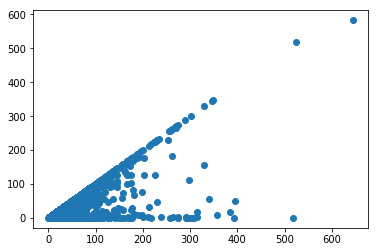

In [22]:
plt.scatter(X, Y)
plt.show

In [78]:
pred_models = pd.DataFrame(columns=['Prediction','KNN', 'OLS'])
bounds = range(1, max(data.aboard))

for x in bounds:
    pred_models = pred_models.append({'Prediction':x, 'KNN':knn.predict(x), 'OLS':regr.predict(x)}, ignore_index=True)
    

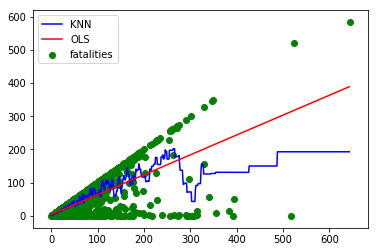

In [79]:
plt.plot(pred_models['Prediction'],pred_models['KNN'], color='b', label='KNN')
plt.plot(pred_models['Prediction'],pred_models['OLS'], color='r', label='OLS')
plt.scatter(X, Y, color='g')
plt.legend()
plt.show()

Above shows the behavior of a KNN model and OLS model in a attempt to predict fatalities in aircraft accidents.

The OLS model seemed to be very influcenced by the lower passenger counts seems to have a much greater error as passenger counts got larger.  The KNN model started to follow the regression line but around approx 250 passengers the prediction was smaller.  The KNN model seems to better in this instance however, if the model accounted for less neighbors the prediction line is much more jagged and looks seems to overfit.

This dataset might not be ideal for either model.  Considering this data has redundant 'aboard' values with contradictory 'fatalities' values that can be quite extreme. (ie 50 aboard with 50 fatalities and 50 aboard with 0 fatalities are both considered in the dataset)  But for generalized trends OLS seems to be a good way to predict smaller data points (<100 aboard), while KNN did a little better with bigger data points (>100 aboard)  